In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
# Load the data
video_games_df = pd.read_csv('/content/Video_Games_Sales_as_at_22_Dec_2016.csv')

video_games_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Checking for missing values in relevant columns
missing_values = video_games_df[['Year_of_Release', 'Genre']].isnull().sum()

# Filtering the data for the years 1991 to 2016
video_games_df_filtered = video_games_df[(video_games_df['Year_of_Release'] >= 1991) &
                                         (video_games_df['Year_of_Release'] <= 2016)]

# Check the data type of 'Year_of_Release'
year_data_type = video_games_df_filtered['Year_of_Release'].dtype

missing_values, year_data_type

(Year_of_Release    269
 Genre                2
 dtype: int64,
 dtype('float64'))

In [4]:
# Removing rows with missing Year_of_Release or Genre
video_games_cleaned = video_games_df_filtered.dropna(subset=['Year_of_Release', 'Genre'])

# Converting Year_of_Release from float to int
video_games_cleaned['Year_of_Release'] = video_games_cleaned['Year_of_Release'].astype(int)

# Check the cleaning results
cleaning_results = {
    'Rows After Cleaning': video_games_cleaned.shape[0],
    'Year_of_Release Data Type': video_games_cleaned['Year_of_Release'].dtype
}

cleaning_results

<ipython-input-4-2ffa4f442d76>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  video_games_cleaned['Year_of_Release'] = video_games_cleaned['Year_of_Release'].astype(int)


{'Rows After Cleaning': 16223, 'Year_of_Release Data Type': dtype('int64')}

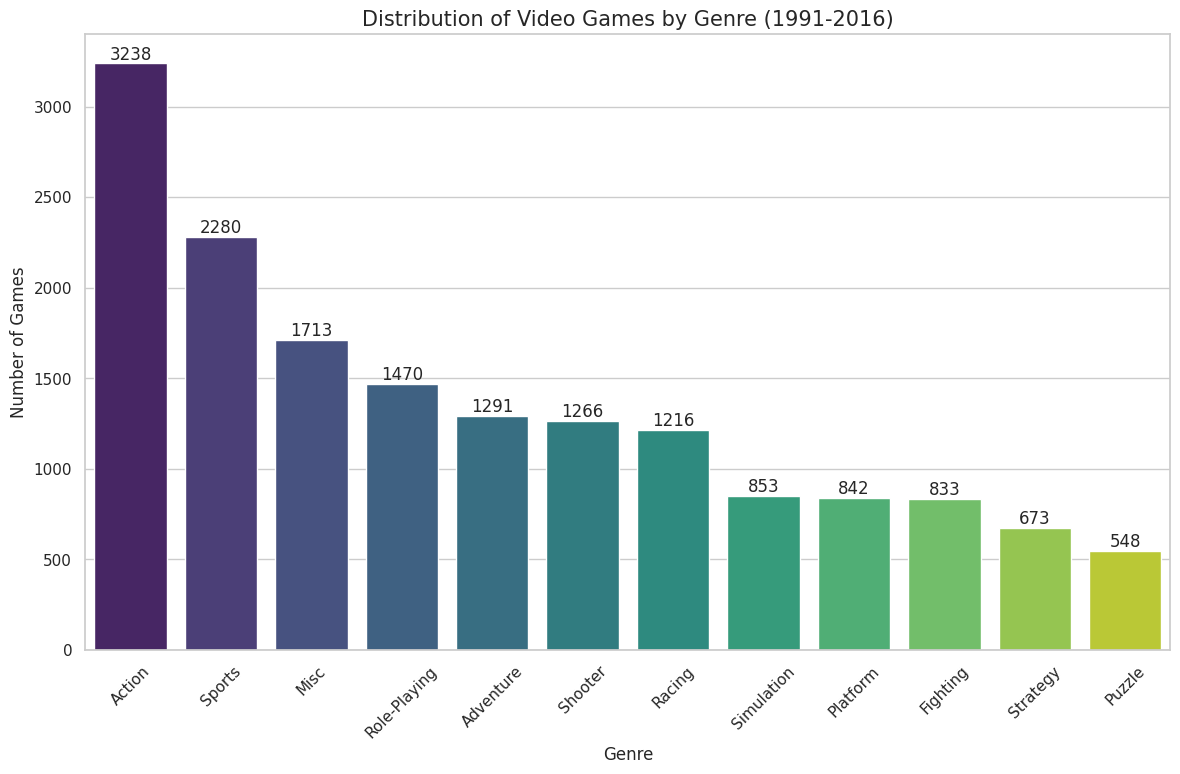

In [8]:
sns.set(style="whitegrid")

# Distribution of Video Games by Genre
genre_distribution = video_games_cleaned['Genre'].value_counts()

plt.figure(figsize=(14, 8))
sns.barplot(x=genre_distribution.index, y=genre_distribution.values, palette="viridis")
plt.title('Distribution of Video Games by Genre (1991-2016)', fontsize=15)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)
plt.xticks(rotation=45)

# Adding the count on top of each bar
for i in range(len(genre_distribution)):
    plt.text(i, genre_distribution[i], genre_distribution[i], ha = 'center', va = 'bottom')

plt.show()


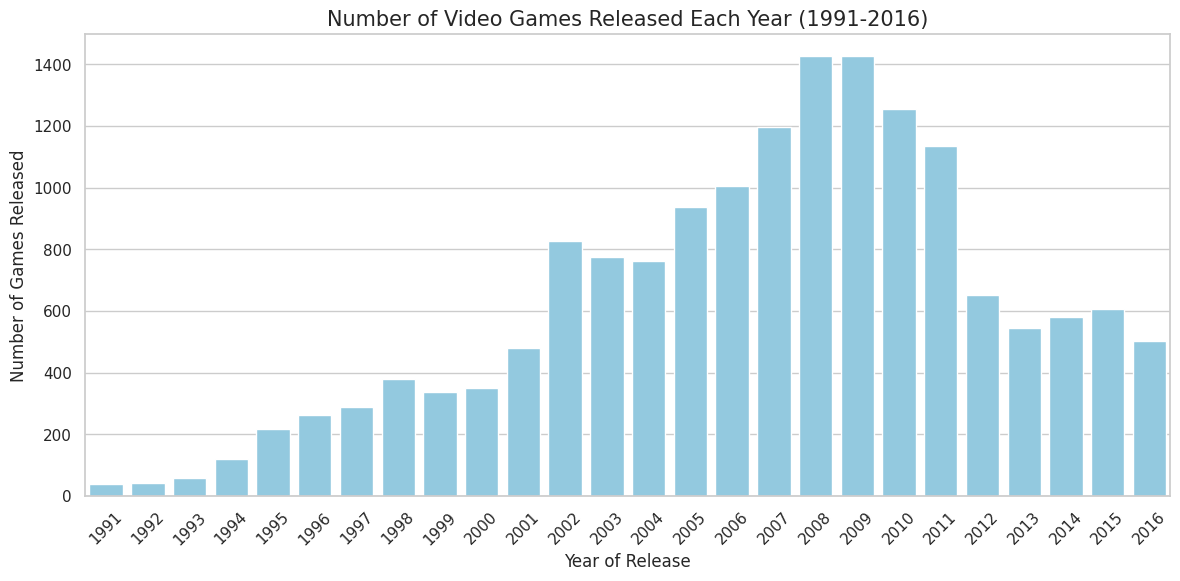

In [10]:
plt.figure(figsize=(14, 6))
sns.countplot(data=video_games_cleaned, x='Year_of_Release', color="skyblue")
plt.title('Number of Video Games Released Each Year (1991-2016)', fontsize=15)
plt.xticks(rotation=45)
plt.xlabel('Year of Release', fontsize=12)
plt.ylabel('Number of Games Released', fontsize=12)
plt.show()

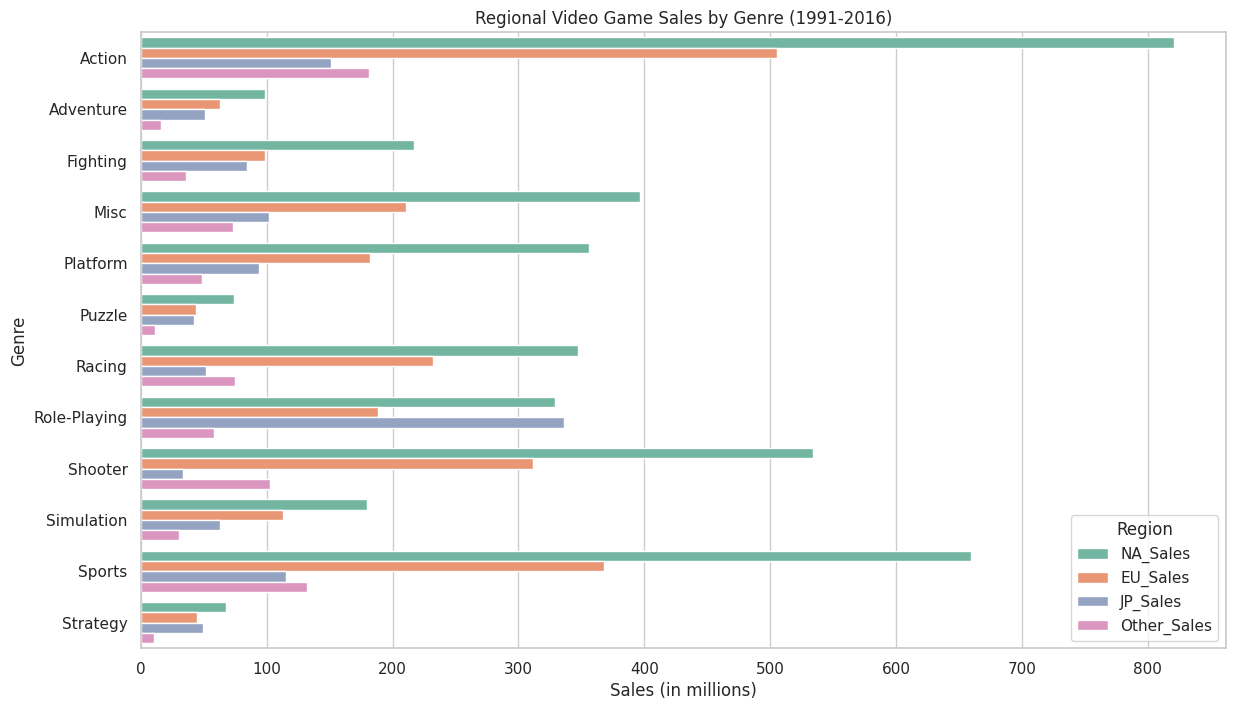

In [11]:
# Grouping data by genre for regional sales analysis
regional_sales = video_games_cleaned.groupby('Genre').agg({'NA_Sales':'sum',
                                                           'EU_Sales':'sum',
                                                           'JP_Sales':'sum',
                                                           'Other_Sales':'sum'}).reset_index()

# Melting the dataframe for easier plotting
regional_sales_melted = pd.melt(regional_sales, id_vars=['Genre'],
                                value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
                                var_name='Region', value_name='Sales')

# Plotting the regional sales
plt.figure(figsize=(14, 8))
sns.barplot(x='Sales', y='Genre', hue='Region', data=regional_sales_melted, palette='Set2')
plt.title('Regional Video Game Sales by Genre (1991-2016)')
plt.xlabel('Sales (in millions)')
plt.ylabel('Genre')
plt.legend(title='Region')
plt.show()

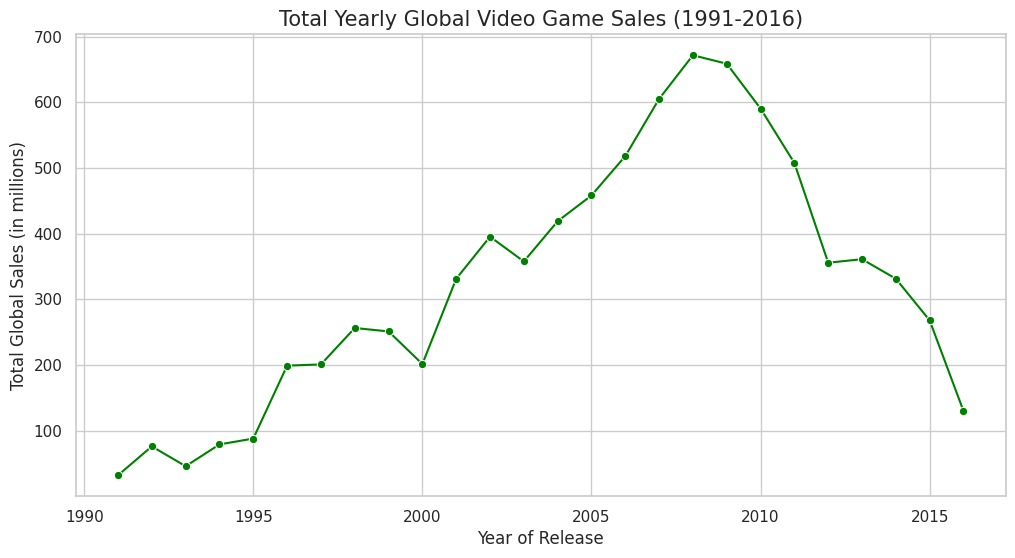

In [12]:
# Calculating total yearly global sales
total_yearly_sales = video_games_cleaned.groupby('Year_of_Release')['Global_Sales'].sum()

# Plotting the total yearly global sales
plt.figure(figsize=(12, 6))
sns.lineplot(x=total_yearly_sales.index, y=total_yearly_sales.values, marker='o', color='green')
plt.title('Total Yearly Global Video Game Sales (1991-2016)', fontsize=15)
plt.xlabel('Year of Release', fontsize=12)
plt.ylabel('Total Global Sales (in millions)', fontsize=12)
plt.grid(True)
plt.show()


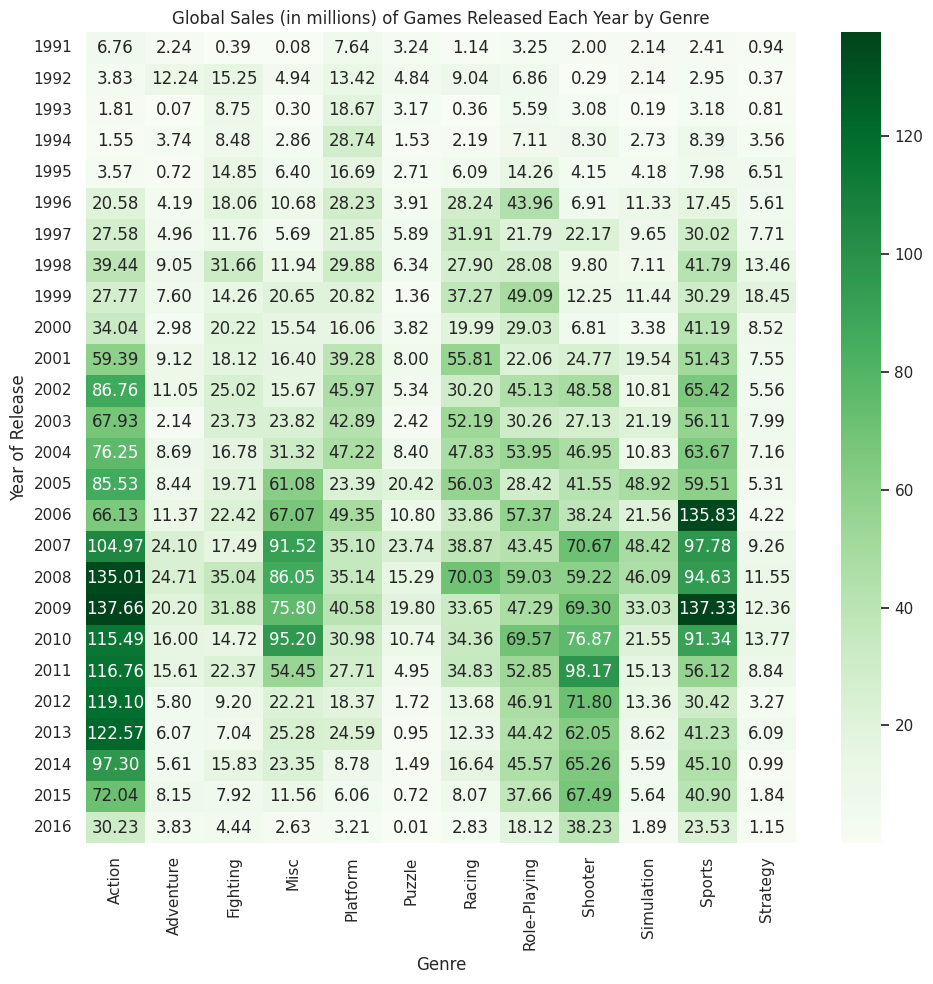

In [13]:
# Creating a pivot table for global sales by year and genre
sales_by_year_and_genre = video_games_cleaned.pivot_table(values='Global_Sales',
                                                          index='Year_of_Release',
                                                          columns='Genre',
                                                          aggfunc='sum',
                                                          fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(sales_by_year_and_genre, annot=True, fmt='.2f', cmap='Greens')
plt.title('Global Sales (in millions) of Games Released Each Year by Genre')
plt.xlabel('Genre')
plt.ylabel('Year of Release')
plt.tight_layout()
plt.show()


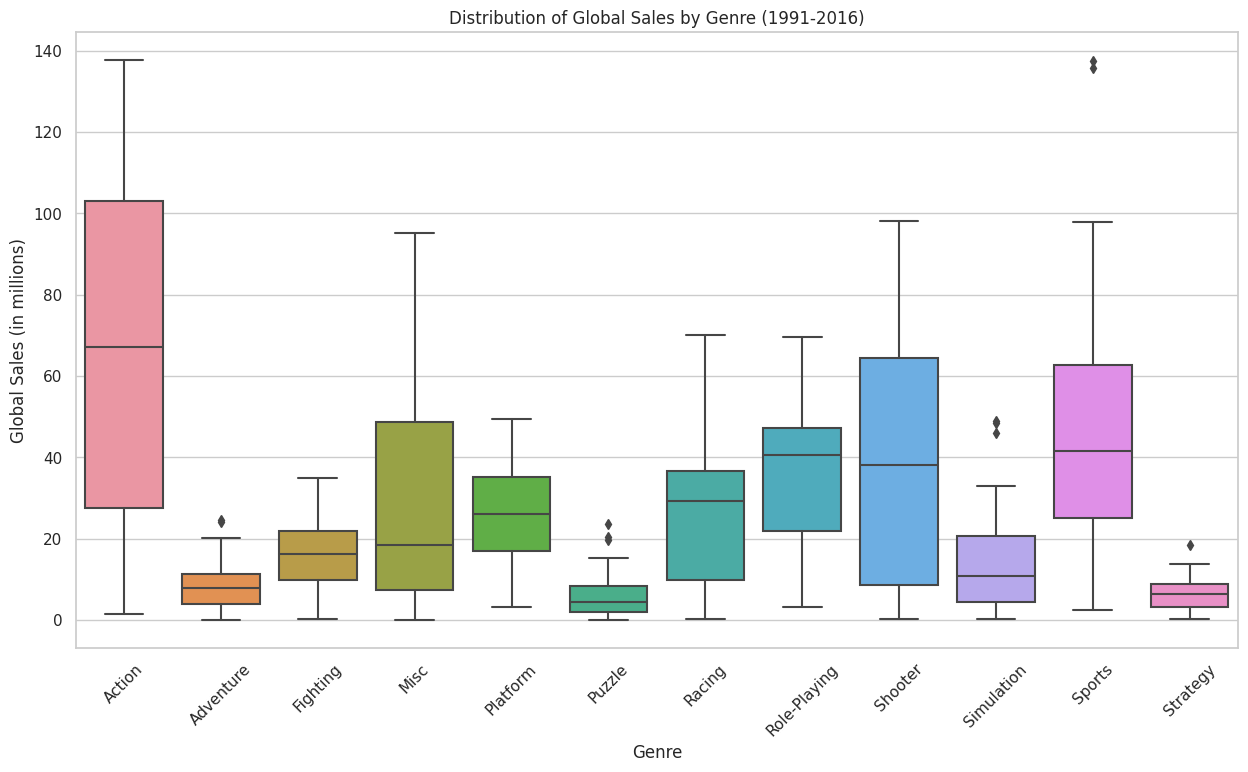

In [14]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=sales_by_year_and_genre)
plt.title('Distribution of Global Sales by Genre (1991-2016)')
plt.ylabel('Global Sales (in millions)')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.show()

In [15]:
# Creating the pivot table for median sales by genre and year using our dataset
median_sales_pivot = video_games_cleaned.pivot_table(index='Year_of_Release',
                                                     columns='Genre',
                                                     values='Global_Sales',
                                                     aggfunc=np.median)

median_sales_pivot.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year_of_Release,,,,,,,,,,,,
1991,0.420,1.120,0.39,0.080,0.78,0.585,1.140,0.38,0.23,1.070,0.280,0.215
1992,3.830,0.470,1.66,2.470,1.00,1.120,4.520,0.97,0.13,2.140,0.370,0.060
1993,0.145,0.070,0.45,0.060,0.56,0.980,0.180,0.32,1.54,0.190,0.180,0.405
1994,0.050,0.435,0.18,0.050,1.79,0.700,0.190,0.12,0.33,0.280,0.345,0.310
1995,0.380,0.050,0.23,0.085,0.30,0.175,0.155,0.34,0.10,0.085,0.190,0.125


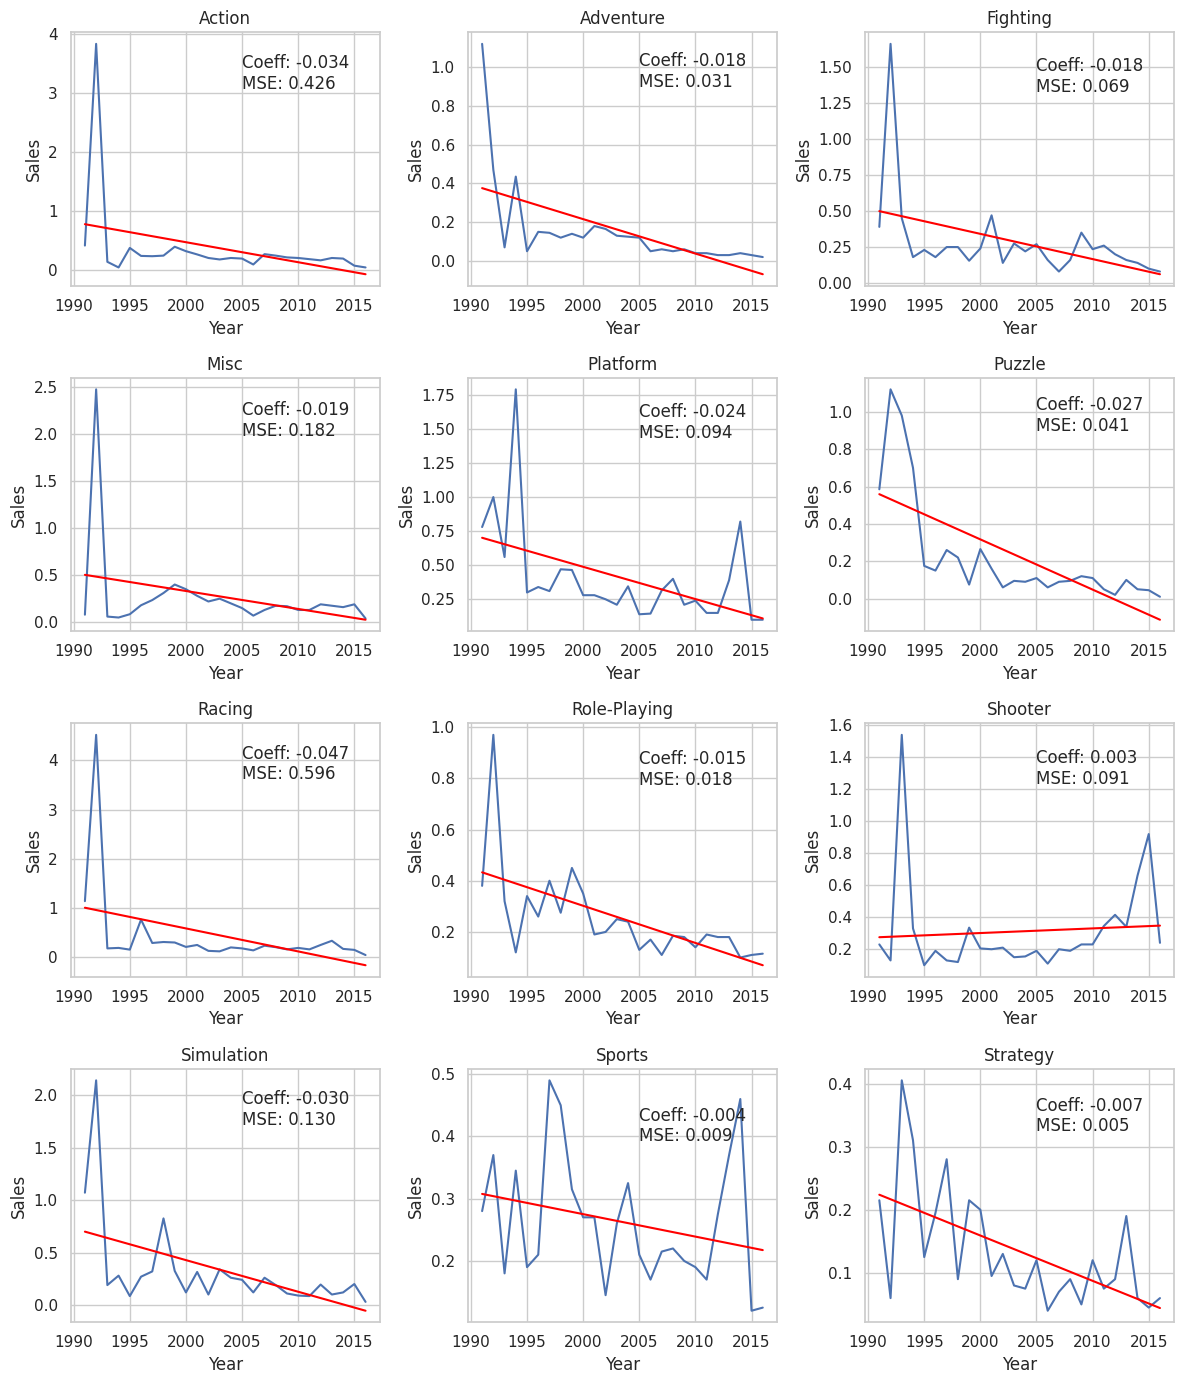

In [16]:
def LR_Plot_Med_Data(Data):
    # Initialize lists for coefficients and MSE
    Regr_Coeff = []
    Regr_MSE = []

    # Prepare figure for subplots
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 14))
    axes = axes.flatten()

    # Loop through each genre
    for idx, genre in enumerate(Data.columns):
        # Linear regression model
        x_data = np.asarray(Data.index).reshape(-1, 1)
        y_data = np.asarray(Data[genre]).reshape(-1, 1)
        model = LinearRegression().fit(x_data, y_data)

        # Store the coefficient and MSE
        Regr_Coeff.append(model.coef_[0][0])
        MSE = np.mean((model.predict(x_data) - y_data) ** 2)
        Regr_MSE.append(MSE)

        # Plotting
        axes[idx].plot(Data.index, Data[genre], label='Actual')
        axes[idx].plot(Data.index, model.predict(x_data), color='red', label='Predicted')

        # Setting plot details
        axes[idx].set_title(genre)
        axes[idx].set_xlabel('Year')
        axes[idx].set_ylabel('Sales')
        axes[idx].text(2005, max(y_data) * 0.8, f'Coeff: {Regr_Coeff[idx]:.3f}\nMSE: {MSE:.3f}')

    plt.tight_layout()
    return [Regr_Coeff, Regr_MSE]

# call the function
[Regr_Coeff, Regr_MSE] = LR_Plot_Med_Data(median_sales_pivot)


In [17]:
# Creating a DataFrame to display the coefficients and MSE for each genre
genre_list = median_sales_pivot.columns
regression_results = pd.DataFrame({
    'Genre': genre_list,
    'Coefficient': Regr_Coeff,
    'MSE': Regr_MSE
})

regression_results.sort_values(by='Coefficient', ascending=False)

,Genre,Coefficient,MSE
8,Shooter,0.002897,0.090635
10,Sports,-0.003609,0.009422
11,Strategy,-0.007181,0.005257
7,Role-Playing,-0.014518,0.018141
2,Fighting,-0.017509,0.068727
1,Adventure,-0.017771,0.031397
3,Misc,-0.019046,0.182028
4,Platform,-0.023665,0.094100
5,Puzzle,-0.026877,0.041042
9,Simulation,-0.030133,0.130467


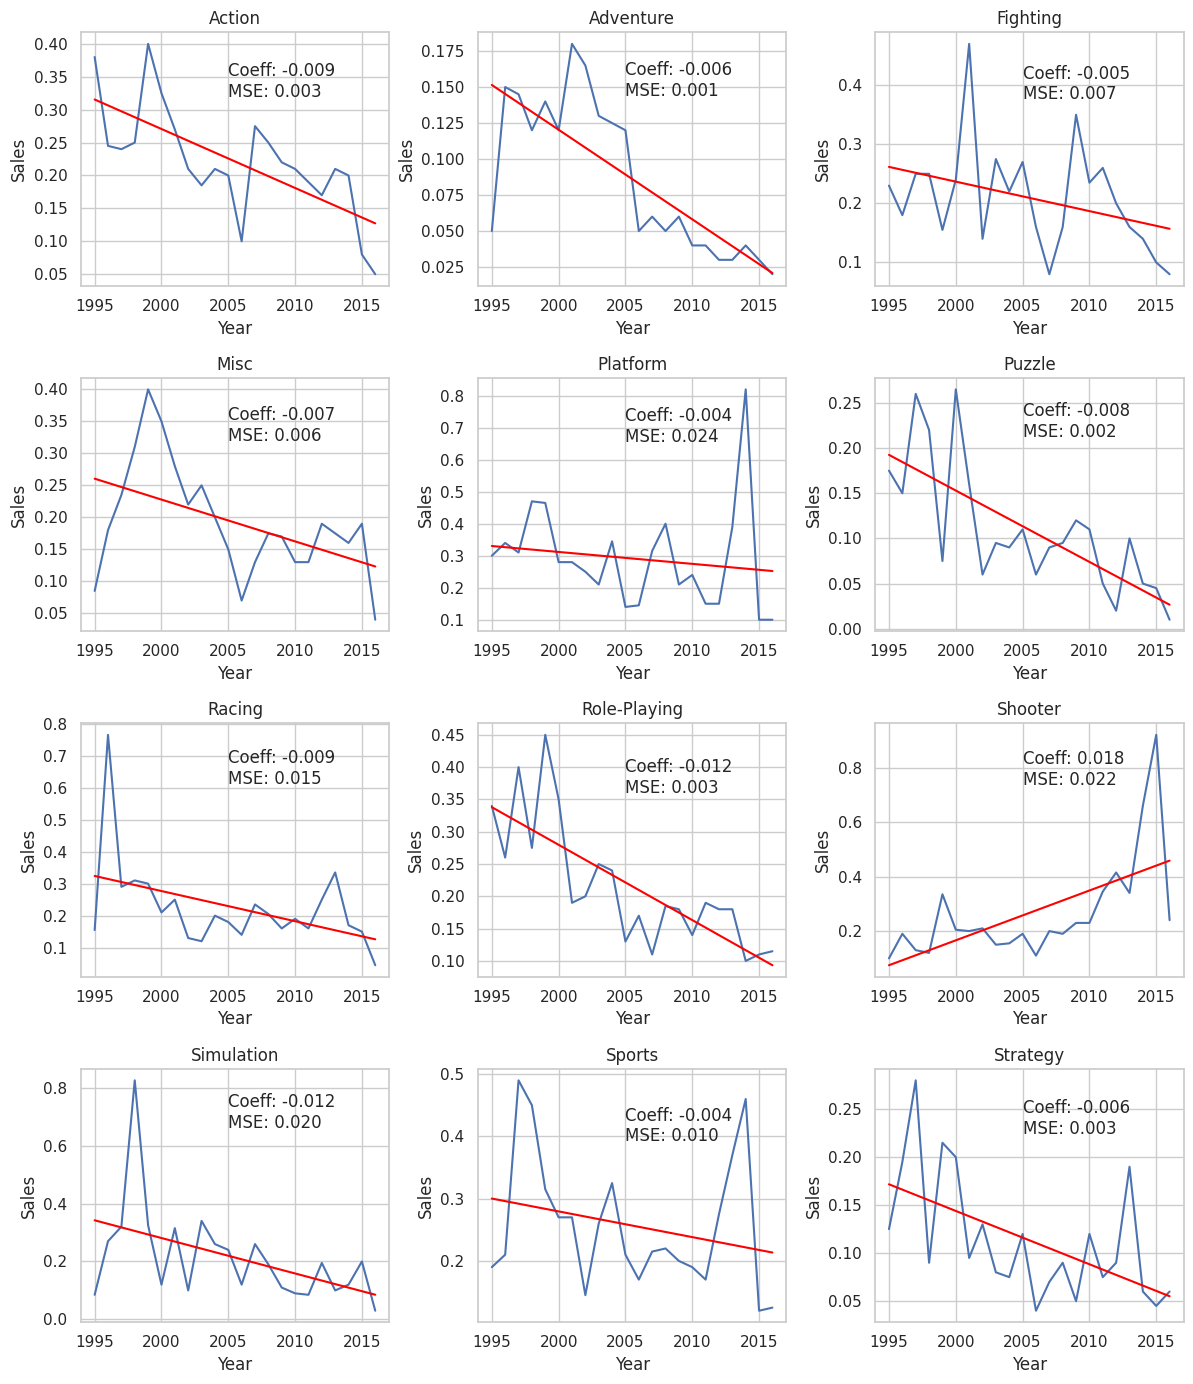

In [18]:
# Filtering the median sales data pivot table for years starting from 1995
median_sales_pivot_filtered = median_sales_pivot[median_sales_pivot.index >= 1995]

[Regr_Coeff, Regr_MSE] = LR_Plot_Med_Data(median_sales_pivot_filtered)

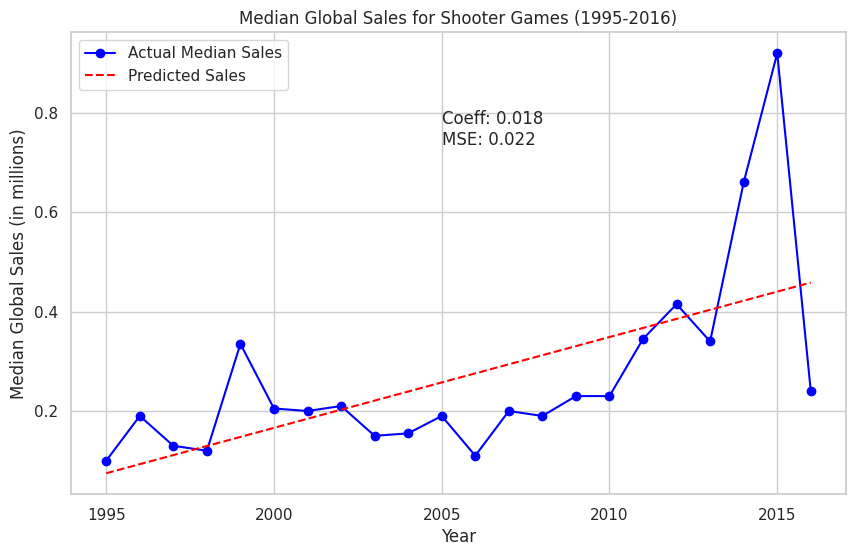

In [19]:
# Extracting data for the "Shooter" genre
shooter_data = median_sales_pivot_filtered['Shooter']

x_data_shooter = np.asarray(shooter_data.index).reshape(-1, 1)
y_data_shooter = np.asarray(shooter_data).reshape(-1, 1)
model_shooter = LinearRegression().fit(x_data_shooter, y_data_shooter)

# Coefficient and MSE
coefficient_shooter = model_shooter.coef_[0][0]
mse_shooter = np.mean((model_shooter.predict(x_data_shooter) - y_data_shooter) ** 2)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(shooter_data.index, shooter_data, label='Actual Median Sales', marker='o', linestyle='-', color='blue')
plt.plot(shooter_data.index, model_shooter.predict(x_data_shooter), label='Predicted Sales', color='red', linestyle='--')
plt.title('Median Global Sales for Shooter Games (1995-2016)')
plt.xlabel('Year')
plt.ylabel('Median Global Sales (in millions)')
plt.text(2005, max(y_data_shooter) * 0.8, f'Coeff: {coefficient_shooter:.3f}\nMSE: {mse_shooter:.3f}')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# Creating a DataFrame to display the coefficients and MSE for each genre
genre_list_filtered = median_sales_pivot_filtered.columns
regression_results_filtered = pd.DataFrame({
    'Genre': genre_list_filtered,
    'Coefficient': Regr_Coeff,
    'MSE': Regr_MSE
})

regression_results_filtered.sort_values(by='Coefficient', ascending=False)

,Genre,Coefficient,MSE
8,Shooter,0.018275,0.021797
4,Platform,-0.003721,0.024200
10,Sports,-0.004128,0.010125
2,Fighting,-0.004989,0.006724
11,Strategy,-0.005553,0.002682
1,Adventure,-0.006220,0.001072
3,Misc,-0.006533,0.005597
5,Puzzle,-0.007899,0.002222
0,Action,-0.008961,0.003407
6,Racing,-0.009430,0.014980


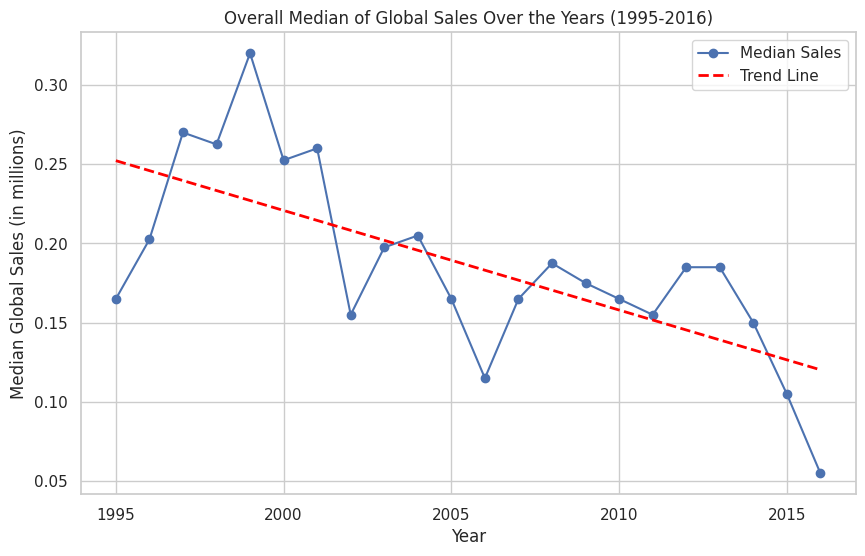

In [21]:
# Calculating the overall median of global sales for each year
overall_median_sales_per_year = median_sales_pivot_filtered.median(axis=1)

# Preparing data for linear regression
x_data = np.asarray(overall_median_sales_per_year.index).reshape(-1, 1)
y_data = np.asarray(overall_median_sales_per_year.values).reshape(-1, 1)

# Linear regression
model = LinearRegression()
model.fit(x_data, y_data)
y_trend = model.predict(x_data)

# Coefficient and MSE
overall_coefficient = model.coef_[0][0]
overall_mse = np.mean((y_trend - y_data) ** 2)

# Plotting the overall median sales over the years
plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data, marker='o', linestyle='-', color='b', label='Median Sales')
plt.plot(x_data, y_trend, color='red', linewidth=2, linestyle='--', label='Trend Line')
plt.title('Overall Median of Global Sales Over the Years (1995-2016)')
plt.xlabel('Year')
plt.ylabel('Median Global Sales (in millions)')
plt.grid(True)
plt.legend()
plt.show()

In [22]:
# Creating a DataFrame to display the regression results
regression_results_global = pd.DataFrame({
    'Metric': ['Global Sales'],
    'Coefficient': [overall_coefficient],
    'MSE': [overall_mse]
})

print(regression_results_global)

         Metric  Coefficient       MSE
0  Global Sales    -0.006283  0.001838
